In [1]:
import os
import numpy as np
from dataclasses import dataclass, fields
from VASP_job.code.main import VASP_job

import pandas as pd
import ase
from ase.spacegroup import crystal

from pyiron.atomistics.structure.atoms import ase_to_pyiron
from pyiron.atomistics.structure.atoms import pyiron_to_ase

import matplotlib.pyplot as plt


# Define a custom formatting function for vectors in pandas
format_vector = lambda vector: '[' + ', '.join(['{:.10f}'.format(x) for x in vector]) + ']'

In [2]:
a = 3.95
alpha = 90
structure = crystal(('Ga', 'Mn', 'N'),
                       basis=[(0.00, 0.00, 0.00), (0.00, 0.50, 0.50), (0.50, 0.50, 0.50)],
                       spacegroup=221,
                       cellpar=[a, a, a, alpha, alpha, alpha])
structure.symbols.species()

{'Ga', 'Mn', 'N'}

In [3]:
# Create a defition that does all this?

executable_path= "/home/emendive/workbench/work/from_claix/codes/VASP/vasp.5.4.4-flag4/bin"
potential_path = "/home/emendive/workbench/work/from_claix/codes/VASP/potentials/potpaw_PBE"
vasp = VASP_job(verbose="low", executable_path=executable_path, potential_path=potential_path)

In [4]:
Dtheta = 120 * np.pi/180
theta = -Dtheta

number_of_atoms = len(structure)
vasp.io.magnetic_inputs.magdirs   = []
vasp.io.magnetic_inputs.ms    = []
# vasp.io.magnetic_inputs.B_CONSTRs = []
for i in range(number_of_atoms):
   if 'Mn' == structure.get_chemical_symbols()[i]:
      theta += Dtheta
      vasp.io.magnetic_inputs.magdirs.append([np.cos(theta), np.sin(theta), 0])
      vasp.io.magnetic_inputs.ms.append(0.9)
      # vasp.io.magnetic_inputs.B_CONSTRs.append([0.0, 0.0, 0.0])
   else:
      vasp.io.magnetic_inputs.magdirs.append([-2.0, 1.0, 0.0])
      vasp.io.magnetic_inputs.ms.append(False)
      # vasp.io.magnetic_inputs.B_CONSTRs.append([0.0, 0.0, 0.0])

In [5]:
vasp.prepare_relaxation(NSW="50")
# vasp.prepare_bfields(LAMBDA="10", I_CONSTRAINED="4")
vasp.set_calculation(structure, vasp.io.magnetic_inputs)

In [10]:
vasp.df

elements              positions  \
0       Ga        [0.0, 0.0, 0.0]   
1       Mn    [0.0, 1.975, 1.975]   
2       Mn    [1.975, 0.0, 1.975]   
3       Mn    [1.975, 1.975, 0.0]   
4        N  [1.975, 1.975, 1.975]   

                                         magdirs     ms  betahs  \
0                               [-2.0, 1.0, 0.0]  False     inf   
1                                  [1.0, 0.0, 0]    0.9    10.0   
2   [-0.4999999999999998, 0.8660254037844387, 0]    0.9    10.0   
3  [-0.5000000000000004, -0.8660254037844384, 0]    0.9    10.0   
4                               [-2.0, 1.0, 0.0]  False     inf   

                                             magmoms  B_CONSTRs  
0                                   [-2.0, 1.0, 0.0]  [0, 0, 0]  
1  [0.9497729829337929, -0.06510591694809763, -0....  [0, 0, 0]  
2  [-0.4104055134281658, 0.6920421562488289, -0.5...  [0, 0, 0]  
3  [-0.8137938031507659, -0.5346969972829986, -0....  [0, 0, 0]  
4                                   [-2.0, 1.0, 0.0]  [0, 0, 0]

In [11]:
df_magmoms = vasp.df["magmoms"].apply(format_vector)
df_magmoms

0      [-2.0000000000, 1.0000000000, 0.0000000000]
1     [0.9497729829, -0.0651059169, -0.3060923071]
2     [-0.4104055134, 0.6920421562, -0.5938391773]
3    [-0.8137938032, -0.5346969973, -0.2276812839]
4      [-2.0000000000, 1.0000000000, 0.0000000000]
Name: magmoms, dtype: object

In [10]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "4"
vasp.structure.kpoints = "2 2 2"
vasp.df = [structure, vasp.io.magnetic_inputs]
df_magmoms = vasp.df["magmoms"].apply(format_vector)
vasp.df

False [False, 0.9, 0.9, 0.9, False] [array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0])]


elements              positions  \
0       Ga        [0.0, 0.0, 0.0]   
1       Mn    [0.0, 1.975, 1.975]   
2       Mn    [1.975, 0.0, 1.975]   
3       Mn    [1.975, 1.975, 0.0]   
4        N  [1.975, 1.975, 1.975]   

                                         magdirs     ms  betahs  \
0                               [-2.0, 1.0, 0.0]  False     inf   
1                                  [1.0, 0.0, 0]    0.9    10.0   
2   [-0.4999999999999998, 0.8660254037844387, 0]    0.9    10.0   
3  [-0.5000000000000004, -0.8660254037844384, 0]    0.9    10.0   
4                               [-2.0, 1.0, 0.0]  False     inf   

                                             magmoms  B_CONSTRs  
0                                   [-2.0, 1.0, 0.0]  [0, 0, 0]  
1  [0.9831005348361498, 0.06169374700398151, 0.17...  [0, 0, 0]  
2  [-0.6815070293611027, 0.5041998174900605, 0.53...  [0, 0, 0]  
3  [-0.5314030270389863, -0.845109129777564, 0.05...  [0, 0, 0]  
4                                   [-2.0, 1.0, 0.0]  [0, 0, 0]

In [11]:
vasp.structure.kpoints

'2 2 2'

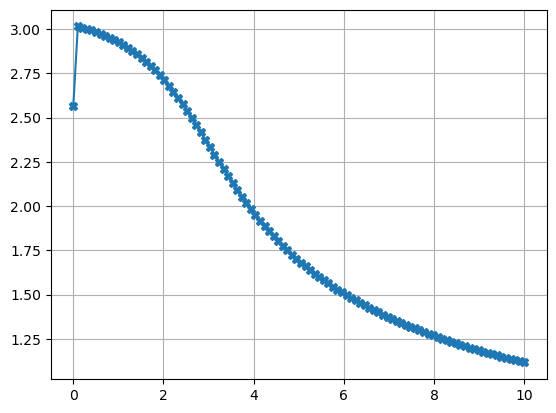

In [14]:
random_number = np.random.random()
random_number = 0.9963636835363322
betahs = np.linspace(0, 10, 100)
thetas = []
for betah in betahs:
   thetas.append( vasp.magnetism.get_theta_mag(random_number, betah) )
plt.plot(betahs, thetas, '-X')
plt.grid(visible=True)

In [ ]:
a=0.0
if a is False:
   print("h")

In [ ]:
vasp.io.magnetic_inputs.betahs

In [ ]:
vasp.io.cwd = "asf"
vasp.io.INCAR_file

In [15]:
vasp.prepare_calculation()

AttributeError: 'magnetism' object has no attribute 'prepare_magnetism'

In [ ]:
vasp.structure.species

In [ ]:
vasp.magnetism.betahs

In [ ]:
structure.set_initial_magnetic_moments([[0, 0, 2], [0, 0, 0], [0, 0, 2], [0, 0, 2], [0, 0, 2]])

In [ ]:
structure = ase_to_pyiron(structure)
Nrepeat=2
structure.set_repeat([Nrepeat,Nrepeat,Nrepeat])

In [ ]:
ase.build.make_supercell(structure, )

In [ ]:
structure.get_initial_magnetic_moments()

In [ ]:
list( structure.symbols.species() )

In [ ]:
structure.get_chemical_symbols()

In [ ]:
structure.get_chemical_symbols().count("Mn")

In [ ]:
structure.cell.array

In [ ]:
list( structure.positions )

In [ ]:
structure.positions

Inputs

- positions
- magmoms
- element
- betah

In [ ]:
lattice = pd.DataFrame({
   "avec"  : structure.cell[0],
   "bvec"  : structure.cell[1],
   "cvec"  : structure.cell[2]
})
lattice

In [ ]:
atoms = pd.DataFrame({
   "elements"  : structure.get_chemical_symbols(),
   "positions" : list( structure.positions ),
   "magmoms"   : list( structure.get_initial_magnetic_moments() ),
   "betahs"    : [1.0, False, 1.0, 0.3, 0.2],
   "B_CONSTRs" : [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1]]
})
atoms = atoms.sort_values("elements")
atoms

In [ ]:
elements = atoms["elements"].tolist()
elements_red = list(dict.fromkeys(elements))
print(elements)
print(elements_red)

In [ ]:
executable_path= "/home/emendive/workbench/work/from_claix/codes/VASP/vasp.5.4.4-flag4/bin"
potential_path = "/home/emendive/workbench/work/from_claix/codes/VASP/potentials/potpaw_PBE"
vasp = VASP_job(verbose="low", executable_path=executable_path, potential_path=potential_path)

vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "5"
vasp.structure.kpoints = "2 2 2"
vasp.prepare_calculation(atoms, structure)

In [ ]:
vasp.io.cwd = '/home/emendive/workbench/devel/gitclones/VASP_job/'
vasp.io.cwd

In [ ]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "5"
vasp.structure.kpoints = "2 2 2"
vasp.prepare_calculation(atoms, structure)

In [ ]:
vasp.structure.elements

In [ ]:
vasp.structure.species

In [ ]:
vasp.structure.elements.count("Mn")

In [ ]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED

In [ ]:
vasp.magnetism.B_CONSTRs

In [ ]:
vasp.io.cwd

In [ ]:
vasp.io.standard_INCAR_parameters

In [ ]:
vasp.structure.kpoints = "1 1 1"
vasp.structure.kpoints

In [ ]:
vasp.structure.elements = ["Ni"]
vasp.io.potential_files.Ni = "Ni"

In [ ]:
class A(object):
    def __init__(self, val):
        self.idx = val

    @property    
    def idx(self):
        return self._idx

    @idx.setter
    def idx(self, val):
        try:
            value1, value2 = val
        except ValueError:
            raise ValueError("Pass an iterable with two items")
        else:
            """ This will run only if no exception was raised """
            self._idx = value1+value2

In [ ]:
my_A = A([1,2])
my_A.idx
my_A.idx = [1,3]
my_A.idx